# "Benford's Law"
> "Some simple investigations into Benford's first-digit law"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Peter Sharp
- categories: [jupyter, mathematics]
- image: images/benford.png

Someone recently mentioned to me that in physics many examples of numerical data have a high likelihood that the intial digit is small. This is known as [Benford's Law](https://en.wikipedia.org/wiki/Benford%27s_law). The explanation isn't clear, but it does require numbers to have a wide spread in magnitudes. Even then [this article](https://digitalcommons.calpoly.edu/cgi/viewcontent.cgi?article=1074&context=rgp_rsr) makes it clear that any simple arguments are suspect.

This feels like something worth exploring!



In [3]:
%matplotlib notebook
import numpy as np
from collections import Counter

# Generate Benford's Law probabilities
benford = np.zeros(10)
benford[0] = np.nan
for d in range(1,10):
    benford[d] = np.log10(1+1/d)
    
# Find the leading digits in a list of values
def find_leads(vals):
    leads = []
    for val in vals:
        while (val >= 10):
            val = val // 10
        leads.append(int(val))
    return leads

# Initial values randomly distributed
vals = [np.random.uniform(100,10000,1000)]

# calculate the changes
variation = "geometric"
for x in range(0,400):
    global vals
    new_vals = []
    for val in vals[-1]:
        if variation == "geometric": # multiplying by a random number
            new_vals.append(val*np.random.uniform(0.9,1.1)) 
        elif variation == "arithmetic":
            change = np.random.uniform(-20,20)
            if val+change > 10:
                new_vals.append(val+change)
            else: 
                new_vals.append(val-change)
    vals.append(new_vals)

# Calculate the leading digits
all_leads = []
for t in range(0,len(vals)):
    leads = find_leads(vals[t])
    data = Counter(leads)
    # data['t'] = t
    all_leads.append(data)

<IPython.core.display.Javascript object>


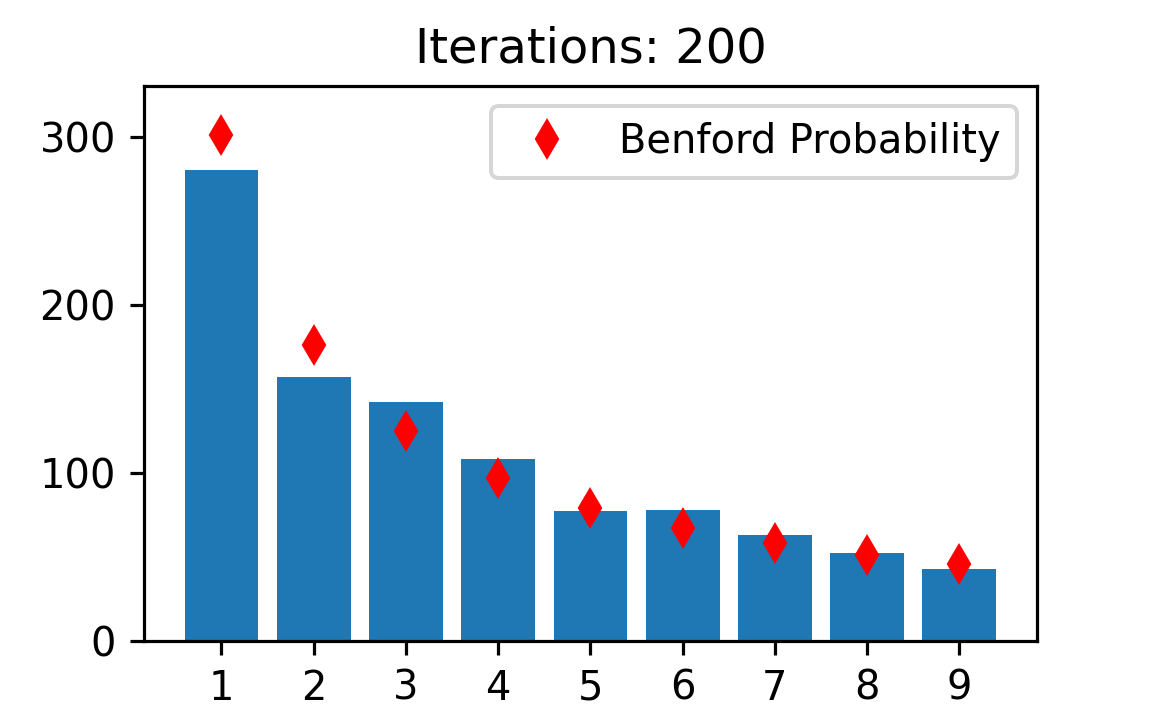

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)

def animate(i):
    ax.clear()
    # bar.set_data(all_leads[i].keys(), all_leads[i].values())
    ax.bar(all_leads[i].keys(), all_leads[i].values())
    ax.plot(np.arange(1,10,1),1000*benford[1:], linestyle="", marker="d",color='r', label="Benford Probability")
    ax.set_title("Iterations: " + str(i))
    ax.set_xticks(np.arange(1,10))
    ax.set_ylim(0,330)
    ax.legend()
   

anim = animation.FuncAnimation(fig, animate, interval=10,frames=400)
plt.show()

# writervideo = animation.FFMpegWriter(fps=40)
# anim.save('benford2.mp4', writer=writervideo)
# plt.close()